<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initial-imports" data-toc-modified-id="Initial-imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initial imports</a></span></li><li><span><a href="#Parametrized-Curves" data-toc-modified-id="Parametrized-Curves-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parametrized Curves</a></span></li><li><span><a href="#Parametrized-Surfaces" data-toc-modified-id="Parametrized-Surfaces-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Parametrized Surfaces</a></span></li><li><span><a href="#Vectorial-Fields" data-toc-modified-id="Vectorial-Fields-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Vectorial Fields</a></span></li><li><span><a href="#Differential-Operations" data-toc-modified-id="Differential-Operations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Differential Operations</a></span></li><li><span><a href="#Line-Integral" data-toc-modified-id="Line-Integral-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Line Integral</a></span></li><li><span><a href="#Surface-integral" data-toc-modified-id="Surface-integral-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Surface integral</a></span></li></ul></div>

# Vector Calculus with Sympy

**For now, in all of the note, the Cartesian Coordinate System is assumed.**

## Initial imports

In [224]:
import numpy as np
from sympy import *
from sympy.vector import *
from sympy.plotting.plot import plot3d_parametric_line, plot3d_parametric_surface, plot_parametric
import matplotlib.pyplot as plt

In [189]:
%matplotlib inline
init_printing()

## Parametrized Curves

Before all we have to define some symbolic parameteres

In [6]:
x,y,z,t,u,v, phi, theta = symbols('x y z t u v phi theta',real=True)

To define a parametrized curve we must first estabilsh a coordinate sytem. To do this we have to import *CoordSys3D* class from *sympy.vector* and then initiate it 

In [12]:
from sympy.vector import CoordSys3D
R = CoordSys3D('R')

Now **R** is our Cartesian coordinate system with tree axis $\hat{i}, \hat{j}$ and $\hat{k}$. 

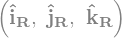

In [15]:
R.i, R.j,R.k

After having a coordinate system, we can define our parametrized curves. As these curves are vector functions, we can define them by the following approach $$\vec r(t) = x(t) \hat{i} + y(t) \hat{j} +z(t) \hat{k}.$$ For example, in 2-dimension space, a circle can be represented by $\vec r(t) = cos(t) \hat{i} + sin(t) \hat{j}$ 

In [53]:
def circle(t): return cos(t)*R.i + sin(t)*R.j

In [54]:
circle(t)

In 3D, the helix $\vec r(t) = cos(t) \hat{i} + sin(t) \hat{j} + t \hat{k}$ we have

In [84]:
def helix(t): return cos(t)*R.i + sin(t)*R.j + t*R.k

In [85]:
helix(t)

We can access to the components of this vector by using *components* attribute. The result is a disctionary. 

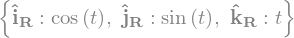

In [86]:
helix(t).components

For example the projection of the vector on x-coordinate is obtained by

In [87]:
helix(t).components[R.i]

Now lets plot this curve. Be sure that the module *plot3d_parametric_line* is imported. With the format that we have defined our curve, we can not feed directly the defined function to the plot module. Take a look at the help of *plot3d_parametric_line*. But don't become nervous! We can solve it. First we have to extract the components and then pass them to the plotting module. 

In [88]:
curve_components = tuple(helix(t).components.values())

Now we can pass the above tuple to the plot3d_parametric_line module. Note the tuple unpacking by `*´

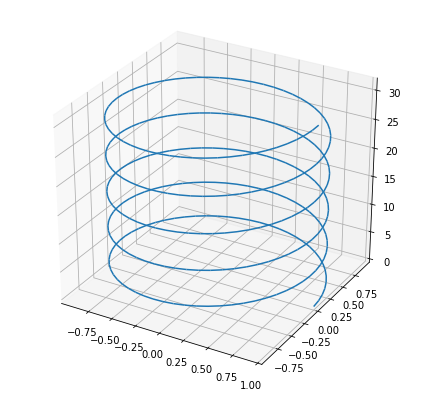

In [89]:
plot3d_parametric_line(*curve_components, (t,0,10*pi))
plt.show()

We can facilitate out task by a simple function that automatize the above procedure. The below function takes a parametrized curve, similar to our notation, and the name of the variable and the interval of plot

In [76]:
def Plot3d_Parametric_Curve(curve, a):
    '''
    curve: must be in the notaion of sympy.vector
    a (tuple): (parameter, start, finish) 
    '''
    #components =[]
    curve_components = tuple(curve.components.values())
    
    plot3d_parametric_line(*curve_components, a)
    plt.show()
    
    
    pass 

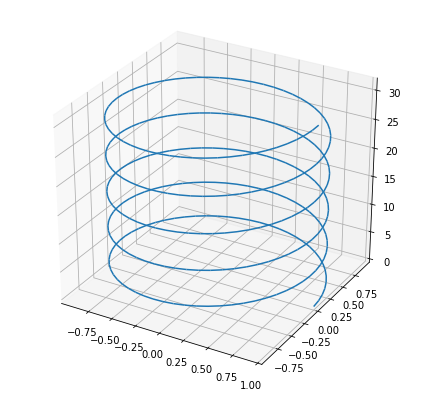

In [90]:
Plot3d_Parametric_Curve(helix(t),(t,0,10*pi))

But how we can plot a 2D parametrized curve? Very similar to the 3D case. Now we automatized for the 3D curves, we can do it directly for 2D curves with a subtle modification. Check if *plot_parametric* module is imported. 

In [81]:
def Plot_Parametric_Curve(curve, a):
    
    '''
    curve: must be in the notaion of sympy.vector
    a (tuple): (parameter, start, finish) 
    '''
    curve_components = tuple(curve.components.values())
    
    plot_parametric(*curve_components, a)
    plt.show()
    
    pass 

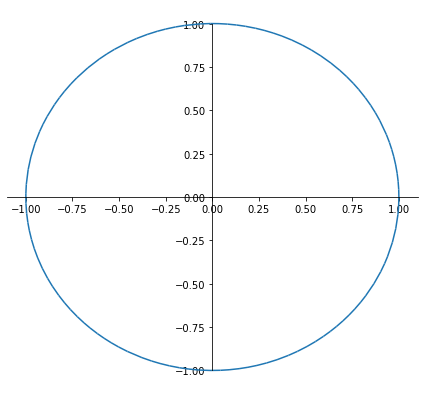

In [82]:
Plot_Parametric_Curve(circle(t),(t,0,2*pi))

As we now a curve is made of infinite points. By substituting a value for the parameter of the curve we can find the point associated to this parameter. For example

In [91]:
helix(pi)

In [92]:
circle(pi)

A parametrized curve, also can be imagined as a trajectory of a particle. This particle has a vector position that connect its position in the space to the origin of a coordinate system. If the parameter of the curve be time, then varying the parameter we get diferent position of the particle during its movement. 

But before that we need a function to adopt the plots of *Sympy* to join with the *matplotlib* ones. We needs the matplotlib for drawing the position vectors. This function was provided in the [Putting together plots of Matplotlib and Sympy](https://stackoverflow.com/questions/60325325/putting-together-plots-of-matplotlib-and-sympy)


In [93]:
def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    # Fix for > sympy v1.5
    backend._process_series(backend.parent._series, ax, backend.parent)
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)

The below function draw some position vectors of a 2D parametrized curve. 

In [175]:
def Plot_Position_Vector(curve, a, number=5):
    '''
    This function takes a 2D curve and draw some of its positional vectors.
    f: (Tuple) 2D parametric curve,
    a: (Tulpe with 3 elements)(parameter, start, stop)
    number: (integer) number of the position vectors in the above interval. 
    '''
    
    from sympy.plotting.plot import plot_parametric
    curve_components = tuple(curve.components.values())
    plot_curve = plot_parametric(*curve_components, a, show=False)
    
    fig, ax = plt.subplots(ncols=1)
    ax.set_aspect('equal')
    
    #here we check to ensure that the free parameter of curve is the same as a[0]
       
    parameters = set()
    for component in curve_components:
        # in the below the 'if statement' check if the component of curve is a sympy object. 
        if isinstance(component,tuple(core.all_classes)):
            parameters.update(component.free_symbols)
    assert a[0]==list(parameters)[0], "Error: The parameter of curve must be the same as first element of second argument"
    
    
    
    dx = [curve_components[0].subs(a[0], i) for i in np.linspace(float(a[1]),float(a[2]), number)]
    dy = [curve_components[1].subs(a[0], i) for i in np.linspace(float(a[1]),float(a[2]), number)]

    for i in range(len(dx)):
        ax.arrow(0,0,float(dx[i]),float(dy[i]),head_width = 0.05, head_length=0.05,length_includes_head=True)
        #ax.add_artist(a)
    
    
   
    
    move_sympyplot_to_axes(plot_curve, ax)
    
    
    plt.show()
    
    

As an Example

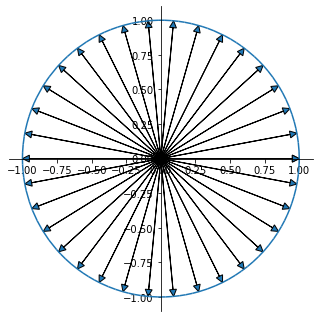

In [176]:
Plot_Position_Vector(circle(t),(t,0,2*pi), 35)

For the position vectors of 3D parametrized curve, beside the function *move_sympyplot_to_axes* we will need to define a new class for 3D arrows, as it is not available in *matplotlib*  yet. This class is a modified version of 2D Arrow class. It was adopted from [Putting arrowheads on vectors in matplotlib's 3d plot](https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot)

In [183]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

Using the above class for the parametrized curves in 3D we have

In [207]:
def Plot3d_Position_Vector(curve, a, number=5):
    '''
    This function takes a 3D curve and draw some of its positional vectors.
    f: (Tuple) 3D parametric curve,
    a: (Tulpe with 3 elements)(parameter, start, stop)
    number: (integer) number of the position vectors in the above interval. 
    '''
    from sympy.plotting.plot import plot3d_parametric_line
    from mpl_toolkits.mplot3d import Axes3D
    curve_components = tuple(curve.components.values())
    plot_curve = plot3d_parametric_line(*curve_components, a, show = False)
    
    
    #here we check to ensure that the free parameter of curve is the same as a[0]
    parameters = set()
    for component in curve_components:
        # in the below the 'if statement' check if the component of curve is a sympy object. 
        if isinstance(component,tuple(core.all_classes)):
            parameters.update(component.free_symbols)
    assert a[0]==list(parameters)[0], "Error: The parameter of curve must be the same as first element of second argument"
    
    
    fig = plt.figure(figsize=(12,9))
    ax = fig.gca(projection='3d')
    
    
    dx = [curve_components[0].subs(a[0], i) for i in np.linspace(float(a[1]),float(a[2]), number)]
    dy = [curve_components[1].subs(a[0], i) for i in np.linspace(float(a[1]),float(a[2]), number)]
    dz = [curve_components[2].subs(a[0], i) for i in np.linspace(float(a[1]),float(a[2]), number)]
    '''
    dx = [Substitute(f[0],(a[0],x)) for x in np.linspace(float(a[1]),float(a[2]),number)]
    dy = [Substitute(f[1],(a[0],y)) for y in np.linspace(float(a[1]),float(a[2]),number)]
    dz = [Substitute(f[2],(a[0],z)) for z in np.linspace(float(a[1]),float(a[2]),number)]'''
    for i in range(len(dx)):
        a = Arrow3D([0,float(dx[i])],[0,float(dy[i])],[0,float(dz[i])], 
                    mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
        ax.add_artist(a)
        
    move_sympyplot_to_axes(plot_curve, ax)
    plt.draw()
    plt.show()

As an example

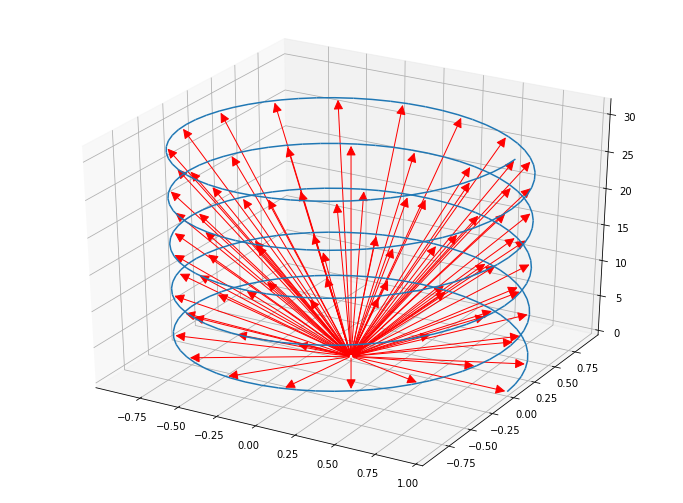

In [208]:
Plot3d_Position_Vector(helix(t),(t,0,10*pi), 85)

Here we have a question, how is the scalar(dot) product between two vectores? 

In [216]:
x1 = Function('x1');x2 = Function('x2');y1 = Function('y1');
y2 = Function('y2');z1 = Function('z1');z2 = Function('z2')

def curve1(t): return x1(t)*R.i + y1(t)*R.j + z1(t)*R.k 
def curve2(t): return x2(t)*R.i + y2(t)*R.j + z2(t)*R.k 

In [217]:
curve1(t).dot(curve2(t))

In [218]:
R.j.dot(R.j)

In [219]:
R.i.dot(R.j)

A function that do the cross product of two vectors 

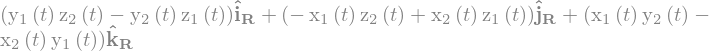

In [220]:
curve1(t).cross(curve2(t))

Just for test

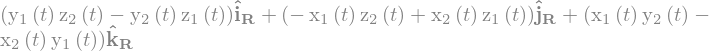

In [221]:
curve1(t) ^ curve2(t)

Finding the norm (module, magnitude) of a vector

In [229]:
def Norm(v):
    return simplify(sqrt(v.dot(v)))

Checking the above function

In [231]:
Norm(curve1(t))

In fact, there is an internal function in Sympy that calculate the norm of a vector

In [228]:
curve1(t).magnitude()

For transfrming a vector to a  unit vector 

In [237]:
def Unit_Vector(curve):
    return curve/Norm(curve)

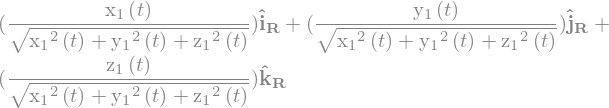

In [238]:
Unit_Vector(curve1(t))

Using the internal function of *normalize*

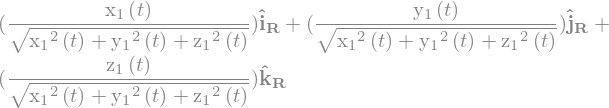

In [235]:
curve1(t).normalize()

For the derivative of a vectorial function

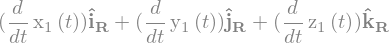

In [232]:
curve1(t).diff(t)

In [239]:
helix(t).diff(t)

Check the above function

If the vectorial function has only one variable (just curves), there is no need to insert it explicitly in *diff()*

In [240]:
helix(t).diff()

Finding the Length of a curve between two points, $t \epsilon [a,b]$

In [241]:
def Arc_Length(curve, a:Tuple): 
    return integrate(Norm(curve.diff()),a)

In [243]:
Arc_Length(helix(t),(t,0,pi))

**Exercise:** Use the internal function *magnitude()* to calculate the length of a curve

Finding the numeric value of the above expression

In [244]:
N(Arc_Length(helix(t),(t,0,pi)))

Finding the circumference of circle with radius 3

In [245]:
Arc_Length(3*circle(t),(t,0,2*pi))

## Parametrized Surfaces

First of all we have to define a function that create a parametrized surface. As we know a parametrized surface has two parameteres. 

In [7]:
def Surface(x,y,z):
    return x,y,z

Checking the above function

In [8]:
surf1 = Surface(v*cos(u), v*sin(u),u); surf1

We can plot it easily but using the module 'plot3d_parametric_surface'. Again note the '*' before the first argument of the function.

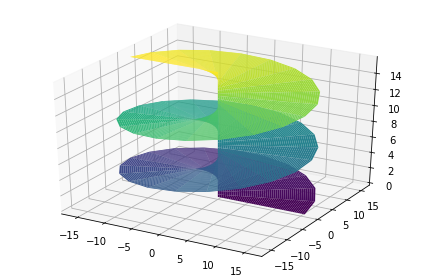

In [56]:
plot3d_parametric_surface(*surf1, (u,0,5*pi),(v,0,5*pi))
plt.show()

Let's plot a unit sphere. First we have to define it in a parametrized way 

In [9]:
sphere = Surface(sin(phi)*cos(theta) , sin(phi)*sin(theta), cos(phi))

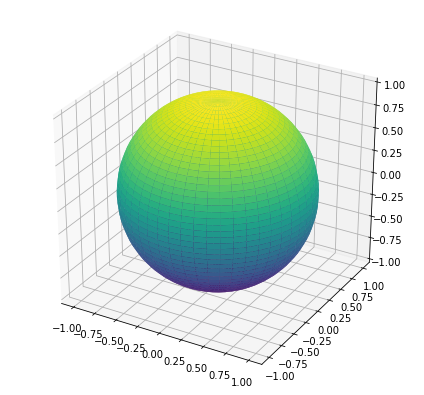

In [10]:
plot3d_parametric_surface(*sphere, (phi,0,pi),(theta,0,2*pi))
plt.show()

The above plot has some problem and is not a perfect sphere! We need to modify some internal functionality of *matplotlib* to solve this issue. A blessed guy helped me find a solution for it [Plot a perfect sphere with equal axes by parametric plot in Sympy](https://stackoverflow.com/questions/60332066/plot-a-perfect-sphere-with-equal-axes-by-parametric-plot-in-sympy)

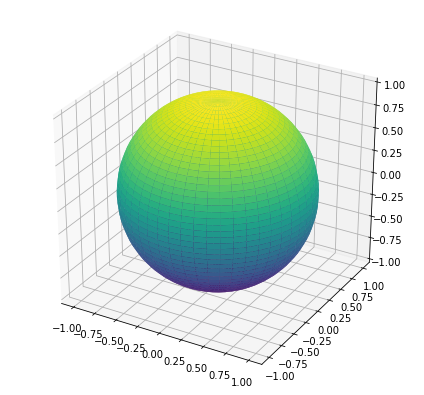

In [11]:
plt.rcParams['figure.figsize'] = 6, 5.6
plot3d_parametric_surface(sin(phi) * cos(theta), sin(phi) * sin(theta), cos(phi),
                          (phi, 0, pi), (theta, 0, 2 * pi))

Our *Diff()* function is working well in the case of a surface

In [36]:
Diff(surf1,u,v)

Our *Substitute()* function is working well in the case of a superface

In [37]:
Substitute(surf1,(u,pi),(v,3))

It would be nice to have a function that gives us the area of a parametrized surface

In [54]:
def Surface_Area(surface, a,b):
    '''
        This function calculate the area of a 3D parametrized surface
        surface:(Tuple) parametrized surface
        a:(Tuple) (first parameter of the surface, initial point, final point)
        b:(Tuple) (second parameter of the surface, initial point, final point)
    '''
        
    module = Norm(Cross(Diff(surface,a[0]),Diff(surface,b[0])))
    return integrate(module, a ,b)

For example the area of a sphere with radius 2 is 

In [56]:
Surface_Area((2*sin(phi)*cos(theta) , 2*sin(phi)*sin(theta), 2*cos(phi)), (theta,0,2*pi), (phi,0,pi))

## Vectorial Fields

In [38]:
def Vector_Field(x,y,z):
    return x,y,z

In [39]:
field1 = Vector_Field(x**2,y**2,z**2)

In [40]:
field1

Plotting a 2D vector field

In [70]:
def Plot_Vector_Field(f:Tuple, a:Tuple, b:Tuple):
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    
    assert len(a)==len(b)==3 , "A 2D vector field need two inputs (as Tuple), each one with three elements "
    assert len(f)==2, "This function just handle 2D vector fields"
    
    xrange = np.linspace(a[1],a[2],15)
    yrange = np.linspace(b[1],b[2],15)
    X,Y = np.meshgrid(xrange, yrange)

    U= np.zeros((15,15))
    V= np.zeros((15,15))

    for i in range(len(xrange)):
        for j in range(len(yrange)):
            x1 = X[i,j]
            y1 = Y[i,j]
            U[i,j] = f[0].subs({a[0]:x1, b[0]:y1})
            V[i,j] = f[1].subs({a[0]:x1, b[0]:y1})

    plt.quiver(X,Y,U,V)
    plt.title(f"vector field {f}")
    plt.show()

Checking the above function

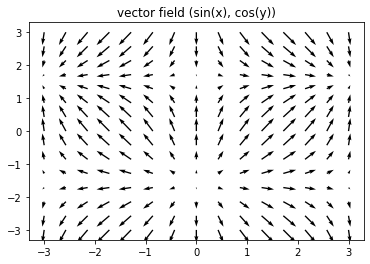

In [42]:
Plot_Vector_Field((sin(x),cos(y)),(x,-3,3),(y,-3,3))

Plotting a 3D vector field **this function needs some adjusments**

In [43]:
def Plot3d_Vector_Field(f, a, b, c, mesh_size=10, length=None):
    assert len(a)==len(b)==len(c)==3, "A 3D vector field needs three argments"
    assert len(f)==3, "This function just handle the 3D vector fields"
    
    from mpl_toolkits.mplot3d import axes3d
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline    
    
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

# Make the grid
    xrange = np.linspace(a[1],a[2],mesh_size)
    yrange = np.linspace(b[1],b[2],mesh_size)
    zrange = np.linspace(c[1],c[2],mesh_size)
    x, y, z = np.meshgrid(xrange, yrange, zrange)
    

# Make the direction data for the arrows
    u = np.zeros((mesh_size,mesh_size,mesh_size))
    v = np.zeros((mesh_size,mesh_size,mesh_size))
    w = np.zeros((mesh_size,mesh_size,mesh_size))
    
    for i in range(len(xrange)):
        for j in range(len(yrange)):
            for k in range(len(zrange)):
                x1 = x[i,j,k]
                y1 = y[i,j,k]
                z1 = z[i,j,k]
                u[i,j,k] = f[0].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                v[i,j,k] = f[1].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                w[i,j,k] = f[2].subs({a[0]:x1, b[0]:y1, c[0]:z1})

    ax.quiver(x, y, z, u, v, w, length=length, normalize=True)

    plt.show()

Checking the above function

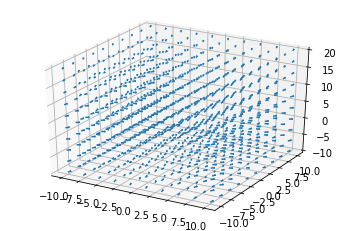

In [44]:
Plot3d_Vector_Field((x**2,y**2,z**2), (x,-10,10),(y,-10,10),(z,-10,20),length=0.5)

A better plooting function for 3D vector fields. This function needs Mayavi package

In [45]:
def Plot3d_Vector_Field_mayavi(f, a, b, c, mask_points=5, scale_factor=3, mesh_size=10):
    assert len(a)==len(b)==len(c)==3, "A 3D vector field needs three argments"
    assert len(f)==3, "This function just handle the 3D vector fields"
    
    %gui qt
    import numpy as np
    from mayavi import mlab   
    mlab.init_notebook()
    mlab.clf()
    
# Make the grid
    xrange = np.linspace(a[1],a[2],mesh_size)
    yrange = np.linspace(b[1],b[2],mesh_size)
    zrange = np.linspace(c[1],c[2],mesh_size)
    x, y, z = np.meshgrid(xrange, yrange, zrange)
    

# Make the direction data for the arrows
    u = np.zeros((mesh_size,mesh_size,mesh_size))
    v = np.zeros((mesh_size,mesh_size,mesh_size))
    w = np.zeros((mesh_size,mesh_size,mesh_size))
    
    for i in range(len(xrange)):
        for j in range(len(yrange)):
            for k in range(len(zrange)):
                x1 = x[i,j,k]
                y1 = y[i,j,k]
                z1 = z[i,j,k]
                u[i,j,k] = f[0].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                v[i,j,k] = f[1].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                w[i,j,k] = f[2].subs({a[0]:x1, b[0]:y1, c[0]:z1})

    src = mlab.pipeline.vector_field(u, v, w)
    return mlab.pipeline.vectors(src, mask_points=mask_points, scale_factor=scale_factor)

Checking the above function. 

In [46]:
Plot3d_Vector_Field_mayavi((x,y,z), (x,-10,10),(y,-10,10),(z,-10,20))

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

## Differential Operations

**Attention! these functions work only for Cartesian Coordinate System**

Gradient of an scalar function. The result is a vector field

In [47]:
def Gradient(f,*args):
    assert len(args)>0 , "Insert the variables"
    grad=[]
    for var in args:
        grad.append(diff(f,var))
    return tuple(grad)

In [48]:
Gradient(x*y*sin(z**2),x,y,z)

Curl of a 3D vector field. The result continue as a vector field

In [49]:
def Curl(f, *args):
    assert len(args)==3, "This function works just in 3D"
    return tuple([diff(f[2],args[1])-diff(f[1],args[2]),diff(f[1],args[2])-diff(f[2],args[0]) \
                ,diff(f[1],args[0])-diff(f[1],args[0])])

Checking the above function

In [50]:
Curl(field1,x,y,z)

Divergent of a vector field. The result is an scalar function

In [51]:
def Divergent(f, *args):
    assert len(f)==len(args), "The number of components of the vector field must be equal to the number of given variables"
    result=0
    for index,component in enumerate(f):
        result+=diff(component,args[index])
    return result


Checking the above function

In [52]:
Divergent(field1,x,y,z)

The *Substitute()* works well on the result of *Divergent*

In [53]:
Substitute(x*y*sin(z**2)+x,(x,3),(y,4),(z,6))

## Line Integral

Line integrais are frequently encountered in science and engineering $$\int_a^b \vec{F}. d\vec{r}$$

In [38]:
def Line_Integral(field,curve,a):
    '''
    field:(Tuple) Vector field F(x,y,z) = (P(x,y,z),R(x,y,z),Q(x,y,z))
    curve:(Tuple) parametrized curve r(t) =(x(t),y(t),z(t))
    a:(Tuple) (parameter of the curve, initial point, final point)
    Note: if the field is tridimensional, the curve also must have the same dimension. 
    
    '''
    assert len(field)==len(curve), "Error: Dimensionaluity of the field and the curve must be equal."
    

    coordinate = [x,y,z]
    parametrized_field=[]
    for index, component in enumerate(field):
        parametrized_field.append(Substitute(component,(coordinate[index], curve[index])))
    
    integrand = Dot(parametrized_field, Diff(curve,a[0]))
    
        
    return integrate(integrand,a)

For example

In [39]:
Line_Integral((x**2,y**2,z**2),(cos(t),sin(t),t), (t,0,pi))

In [40]:
Line_Integral((x**3,sqrt(y)),(cos(t),t), (t,0,pi))

## Surface integral

The flux of a vectorial field through a surface is calculated using surface integral

In [49]:
def Surface_Integral(field,surface, a = 0, b = 0):
    '''
    field:(Tuple) Vector field
    surface:(Tuple) parametrized surface
    a:(Tuple) (first parameter of the surface, initial point, final point)
    b:(Tuple) (second parameter of the surface, initial point, final point)
    Note: if the vector field is tridimensional, the surface also must have the same dimensions. 
    
    '''
    assert len(field)==len(surface), "Error: Dimensionaluity of the field and the curve must be equal."
    
    module = Cross(Diff(surface,a[0]),Diff(surface,b[0]))
    
    coordinate = [x,y,z]
    parametrized_field=[]
    for index, component in enumerate(field):
        parametrized_field.append(Substitute(component,(coordinate[index], surface[index])))
    
    
    return integrate(Dot(parametrized_field,module),a,b)

For example we get

In [50]:
Surface_Integral((x**2,y**2,z**2),(x , y, x**2+y**2), (x,0,2), (y,0,3))

In [52]:
from sympy.abc import theta , phi

In [53]:
Surface_Integral((x**2,y**2,z**2),(sin(phi)*cos(theta) , sin(phi)*sin(theta), cos(phi)), (theta,0,2*pi), (phi,0,pi))